## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [1]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# TODO: load in your excel file and print out how many missing values are in each column
df = pd.read_excel("../../data/raw/realestate.xlsx")

df.isnull().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [22]:
# TODO: using this dictionary, rename the relevant columns in your dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [55]:
selected = ["lat", "long", "No"]

# TODO: Drop the above selected columns from your dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(columns=selected)

In [56]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype("float")

In [57]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [58]:
# TODO: Remove missing values from this dataframe
df_bool = pd.notnull(df_drop)
df_drop = df_drop[df_bool]

# check shape again
df_drop.shape

(414, 4)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [59]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
print(df_drop.describe())

        house_age  distance_to_mrt  num_convenience_stores  price_unit_area
count  403.000000       414.000000              413.000000       414.000000
mean    18.607196      1083.885689                4.283293        37.980193
std     22.656541      1262.109595                5.580361        13.606488
min      0.000000        23.382840               -6.000000         7.600000
25%      8.700000       289.324800                1.000000        27.700000
50%     16.100000       492.231300                4.000000        38.450000
75%     28.300000      1454.279000                6.000000        46.600000
max    410.300000      6488.021000              100.000000       117.500000


In [66]:
# notice how the minimum value for "num_convenience_stores" is -6
# TODO: how do we have -6 convenience stores? this must be an error, let's remove it
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_drop["num_convenience_stores"] = df_drop["num_convenience_stores"][df_drop["num_convenience_stores"] >= 0]

In [68]:
# notice how the maximum value for "num_convenience_stores" is 100
# this value does not show up in any other row and represents an extreme outlier
# TODO: this is most likely an error, let's remove it
df_drop["num_convenience_stores"] = df_drop["num_convenience_stores"][df_drop["num_convenience_stores"] < 100]

In [69]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# TODO: let's remove this value
df_drop["house_age"] = df_drop["house_age"][df_drop["house_age"] <= 325]

array([[<Axes: title={'center': 'house_age'}>]], dtype=object)

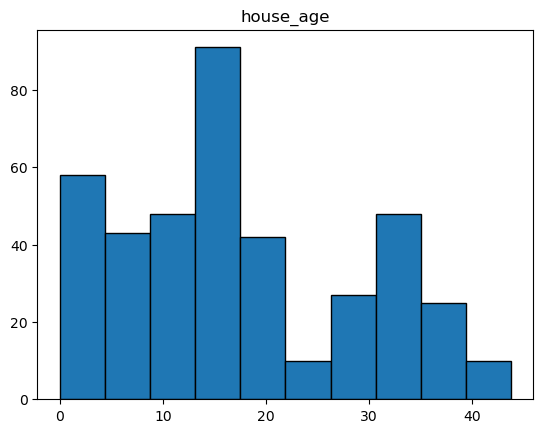

In [70]:
# TODO : plot histograms, boxplots, and barcharts of all available numeric columns. 
# Create as many additional code blocks as needed to present your visualizations.
# article: https://www.statology.org/univariate-analysis-in-python/ 
df_drop.hist(column="house_age", grid=False, edgecolor="black")

<Axes: >

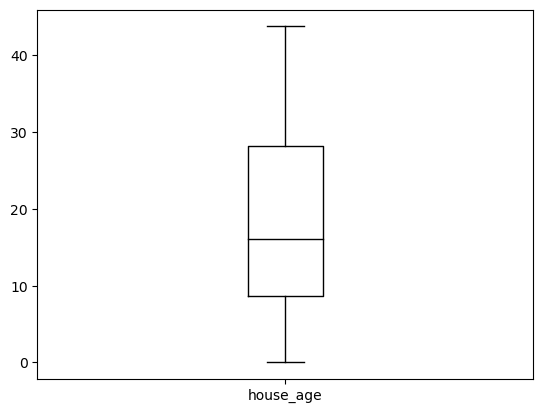

In [71]:
df_drop.boxplot(column="house_age", grid=False, color="black")

array([[<Axes: title={'center': 'distance_to_mrt'}>]], dtype=object)

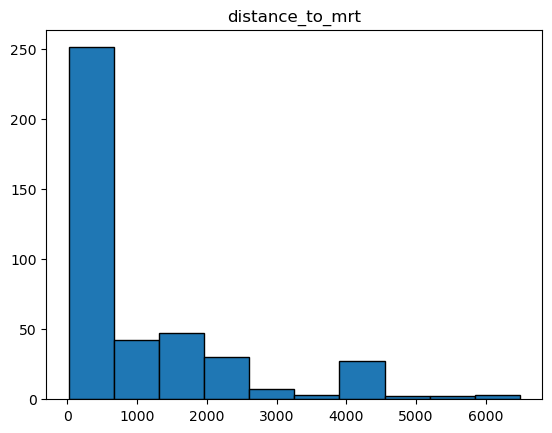

In [74]:
df_drop.hist(column="distance_to_mrt", grid=False, edgecolor="black")

<Axes: >

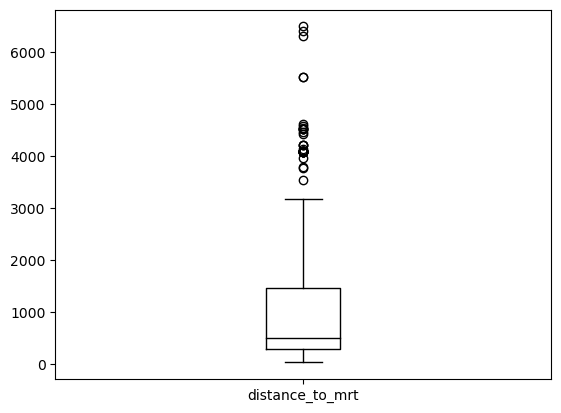

In [77]:
df_drop.boxplot(column="distance_to_mrt", grid=False, color="black")

array([[<Axes: title={'center': 'num_convenience_stores'}>]], dtype=object)

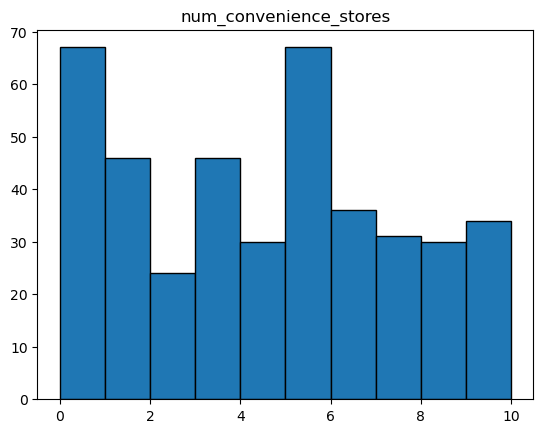

In [78]:
df_drop.hist(column="num_convenience_stores", grid=False, edgecolor="black")

<Axes: >

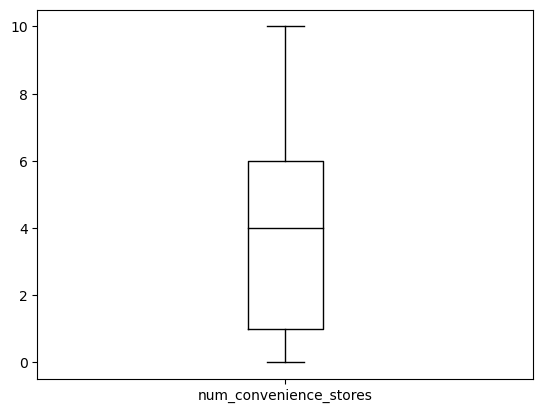

In [79]:
df_drop.boxplot(column="num_convenience_stores", grid=False, color="black")

array([[<Axes: title={'center': 'price_unit_area'}>]], dtype=object)

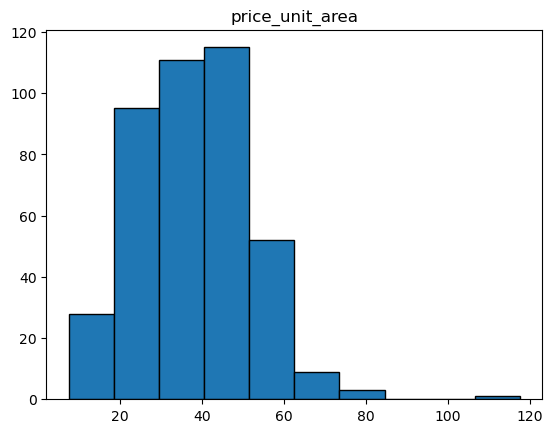

In [80]:
df_drop.hist(column="price_unit_area", grid=False, edgecolor="black")

<Axes: >

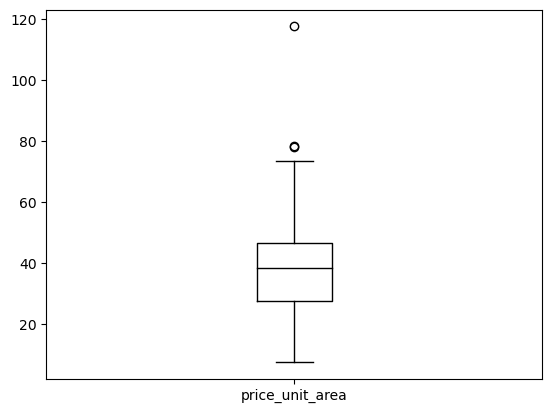

In [81]:
df_drop.boxplot(column="price_unit_area", grid=False, color="black")

Text(0, 0.5, 'Distance to MRT')

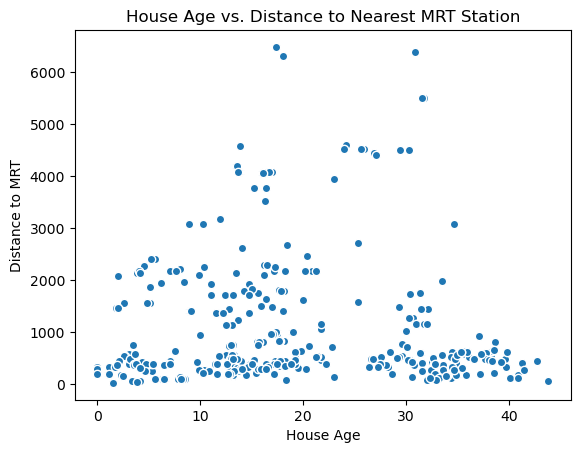

In [84]:
# TODO : plot scatter-plots and other visualizations of all available numeric columns. 
# Create as many additional code blocks as needed to present your visualizations.
# article: https://www.statology.org/bivariate-analysis-in-python/
plt.scatter(df_drop["house_age"], df_drop["distance_to_mrt"], edgecolors="white")
plt.title("House Age vs. Distance to Nearest MRT Station")
plt.xlabel("House Age")
plt.ylabel("Distance to MRT")

Text(0, 0.5, 'Distance to MRT')

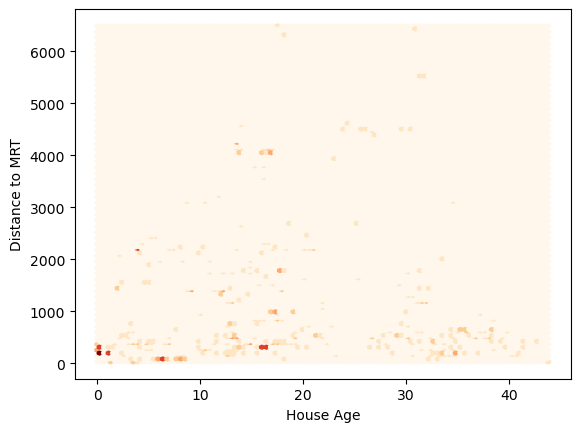

In [101]:
plt.hexbin(df_drop["house_age"], df_drop["distance_to_mrt"], cmap="OrRd")
plt.xlabel("House Age")
plt.ylabel("Distance to MRT")

Text(0, 0.5, 'Number of Convenience Stores')

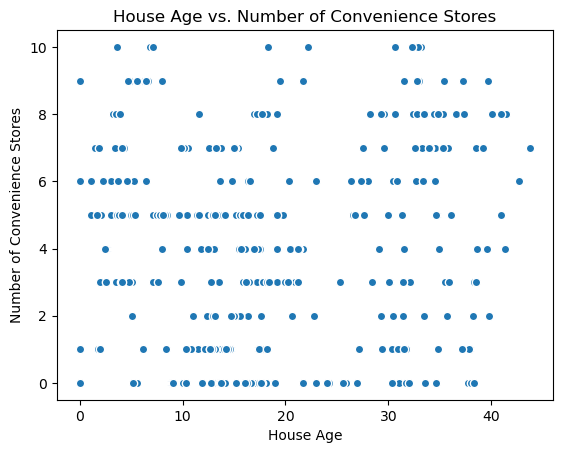

In [85]:
plt.scatter(df_drop["house_age"], df_drop["num_convenience_stores"], edgecolors="white")
plt.title("House Age vs. Number of Convenience Stores")
plt.xlabel("House Age")
plt.ylabel("Number of Convenience Stores")

Text(0, 0.5, 'Number of Convenience Stores')

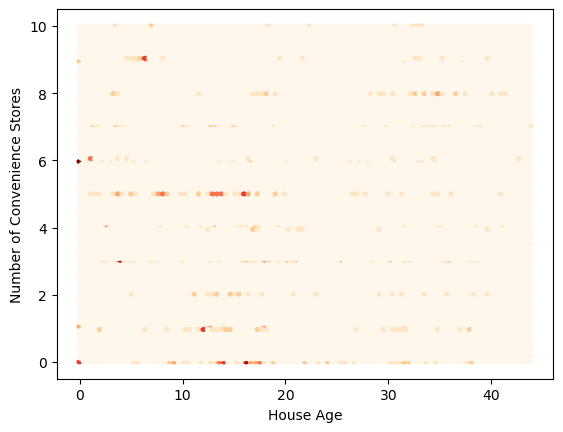

In [100]:
plt.hexbin(df_drop["house_age"], df_drop["num_convenience_stores"], cmap="OrRd")
plt.xlabel("House Age")
plt.ylabel("Number of Convenience Stores")

Text(0, 0.5, 'Price of Unit Area')

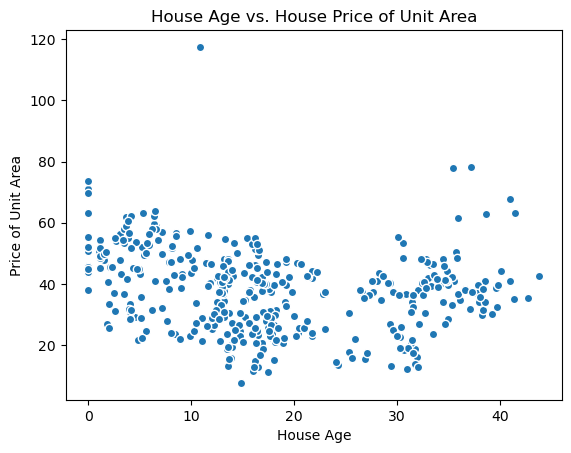

In [87]:
plt.scatter(df_drop["house_age"], df_drop["price_unit_area"], edgecolors="white")
plt.title("House Age vs. House Price of Unit Area")
plt.xlabel("House Age")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Price of Unit Area')

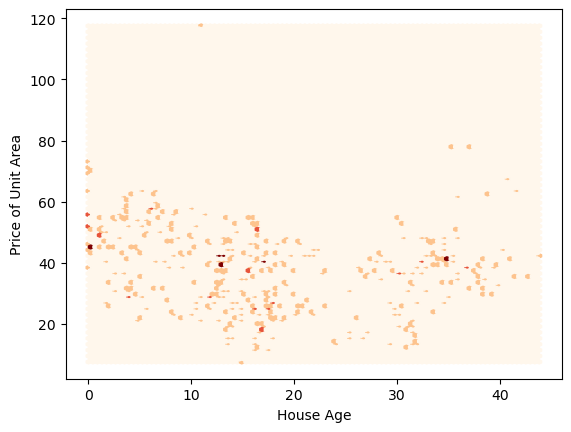

In [96]:
plt.hexbin(df_drop["house_age"], df_drop["price_unit_area"], cmap="OrRd")
plt.xlabel("House Age")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Number of Convenience Stores')

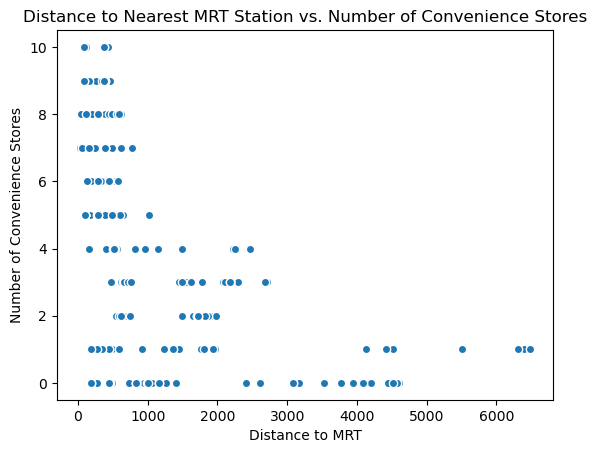

In [89]:
plt.scatter(df_drop["distance_to_mrt"], df_drop["num_convenience_stores"], edgecolors="white")
plt.title("Distance to Nearest MRT Station vs. Number of Convenience Stores")
plt.xlabel("Distance to MRT")
plt.ylabel("Number of Convenience Stores")

Text(0, 0.5, 'Number of Convenience Stores')

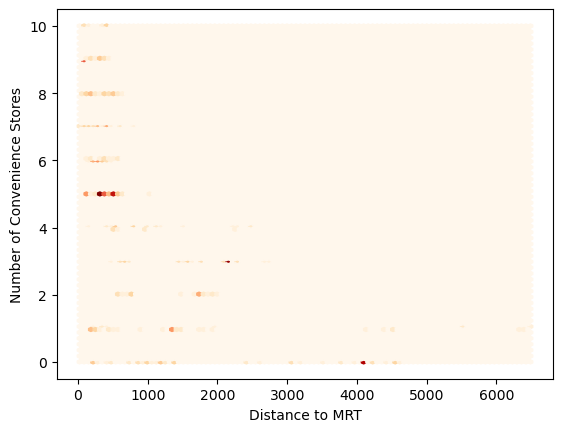

In [97]:
plt.hexbin(df_drop["distance_to_mrt"], df_drop["num_convenience_stores"], cmap="OrRd")
plt.xlabel("Distance to MRT")
plt.ylabel("Number of Convenience Stores")

Text(0, 0.5, 'Price of Unit Area')

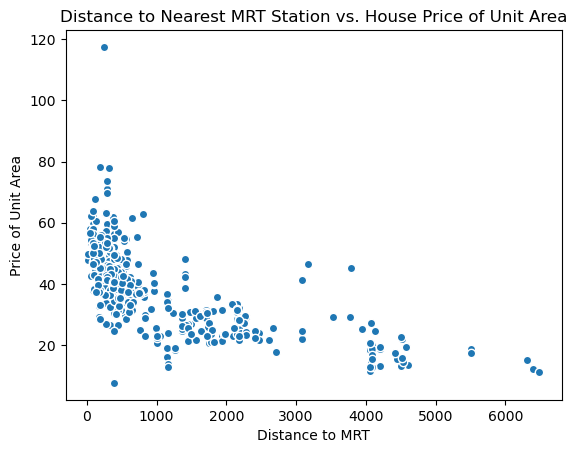

In [88]:
plt.scatter(df_drop["distance_to_mrt"], df_drop["price_unit_area"], edgecolors="white")
plt.title("Distance to Nearest MRT Station vs. House Price of Unit Area")
plt.xlabel("Distance to MRT")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Price of Unit Area')

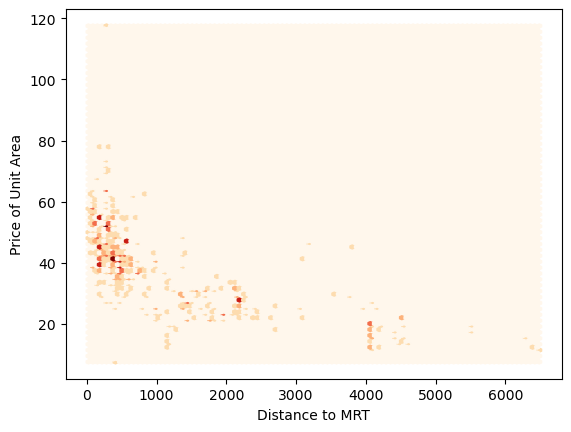

In [98]:
plt.hexbin(df_drop["distance_to_mrt"], df_drop["price_unit_area"], cmap="OrRd")
plt.xlabel("Distance to MRT")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Price of Unit Area')

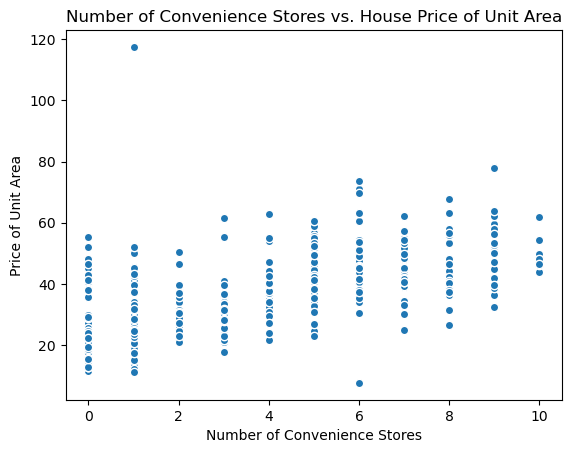

In [90]:
plt.scatter(df_drop["num_convenience_stores"], df_drop["price_unit_area"], edgecolors="white")
plt.title("Number of Convenience Stores vs. House Price of Unit Area")
plt.xlabel("Number of Convenience Stores")
plt.ylabel("Price of Unit Area")

Text(0, 0.5, 'Price of Unit Area')

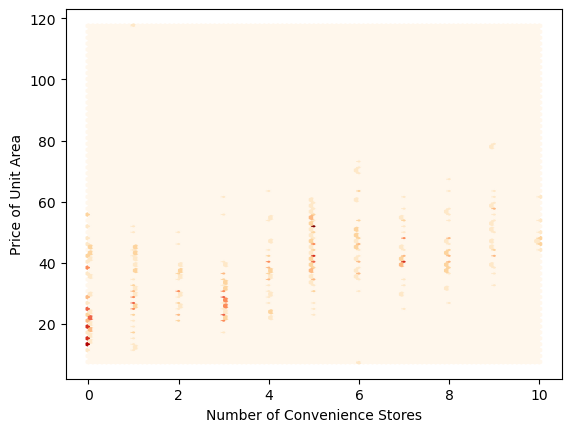

In [99]:
plt.hexbin(df_drop["num_convenience_stores"], df_drop["price_unit_area"], cmap="OrRd")
plt.xlabel("Number of Convenience Stores")
plt.ylabel("Price of Unit Area")

In [102]:
# TODO: save your transformed dataframe into `data/processed` for modeling
df_drop.to_excel("../../data/processed/real_estate.xlsx")